### **_"Первым делом, первым делом - самолёты..."_**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***
*Считываем основной датасет.*

In [2]:
data = pd.read_csv('project_4_data.csv')
data

,fl_id,dep_air,arr_air,craft_model,flight_duration,pass_count,flight_revenue
0,136119,AAQ,SVO,Boeing 737-300,101.0,113.0,1653000.0
1,136120,AAQ,SVO,Boeing 737-300,99.0,109.0,1605400.0
2,136122,AAQ,SVO,Boeing 737-300,100.0,97.0,1431000.0
3,136130,AAQ,SVO,Boeing 737-300,99.0,107.0,1556600.0
4,136131,AAQ,SVO,Boeing 737-300,99.0,124.0,1812800.0
...,...,...,...,...,...,...,...
188,136943,AAQ,EGO,Sukhoi Superjet-100,50.0,94.0,733800.0
189,136951,AAQ,EGO,Sukhoi Superjet-100,49.0,90.0,720600.0
190,136953,AAQ,EGO,Sukhoi Superjet-100,50.0,97.0,765300.0
191,136956,AAQ,EGO,Sukhoi Superjet-100,50.0,96.0,746400.0


**_Описание признаков_**:
* **fl_id** - идентификатор рейса
* **dep_air** - аэропорт отправления
* **arr_air** - аэропорт прибытия
* **craft_model** - модель самолёта
* **flight_duration** - длительность полёта в минутах
* **pass_count** - актуальное количество пассажиров в самолёте
* **flight_revenue** - доход от продажи билетов, руб.
***

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fl_id            193 non-null    int64  
 1   dep_air          193 non-null    object 
 2   arr_air          193 non-null    object 
 3   craft_model      193 non-null    object 
 4   flight_duration  193 non-null    float64
 5   pass_count       180 non-null    float64
 6   flight_revenue   180 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


In [4]:
data.describe()

,fl_id,flight_duration,pass_count,flight_revenue
count,193.000000,193.000000,180.000000,1.800000e+02
mean,136540.466321,90.538860,101.950000,1.179647e+06
std,249.389171,62.864684,14.423086,4.811836e+05
min,136119.000000,49.000000,64.000000,5.310000e+05
25%,136320.000000,50.000000,93.000000,7.385250e+05
50%,136534.000000,99.000000,97.000000,1.068850e+06
75%,136768.000000,100.000000,112.250000,1.631950e+06
max,136961.000000,312.000000,130.000000,1.886000e+06


In [5]:
print(data.isnull().sum())
data[data.arr_air == 'NOZ']

fl_id               0
dep_air             0
arr_air             0
craft_model         0
flight_duration     0
pass_count         13
flight_revenue     13
dtype: int64


,fl_id,dep_air,arr_air,craft_model,flight_duration,pass_count,flight_revenue
90,136511,AAQ,NOZ,Boeing 737-300,310.0,NaN,NaN
91,136513,AAQ,NOZ,Boeing 737-300,310.0,NaN,NaN
92,136514,AAQ,NOZ,Boeing 737-300,299.0,NaN,NaN
93,136518,AAQ,NOZ,Boeing 737-300,304.0,NaN,NaN
94,136523,AAQ,NOZ,Boeing 737-300,312.0,NaN,NaN
95,136533,AAQ,NOZ,Boeing 737-300,303.0,NaN,NaN
96,136534,AAQ,NOZ,Boeing 737-300,304.0,NaN,NaN
97,136540,AAQ,NOZ,Boeing 737-300,307.0,NaN,NaN
98,136544,AAQ,NOZ,Boeing 737-300,304.0,NaN,NaN
99,136546,AAQ,NOZ,Boeing 737-300,302.0,NaN,NaN


Как упоминалось в презентации основного датасета, из аэропорта Анапы регулярно совершается рейс самолёта Boeing 737-300 в "порожнем" состоянии, без пассажиров. Для наших целей эти записи не нужны. Избавимся от них.

In [6]:
data = data.dropna(); data = data.reset_index()
del data['index']
data

,fl_id,dep_air,arr_air,craft_model,flight_duration,pass_count,flight_revenue
0,136119,AAQ,SVO,Boeing 737-300,101.0,113.0,1653000.0
1,136120,AAQ,SVO,Boeing 737-300,99.0,109.0,1605400.0
2,136122,AAQ,SVO,Boeing 737-300,100.0,97.0,1431000.0
3,136130,AAQ,SVO,Boeing 737-300,99.0,107.0,1556600.0
4,136131,AAQ,SVO,Boeing 737-300,99.0,124.0,1812800.0
...,...,...,...,...,...,...,...
175,136943,AAQ,EGO,Sukhoi Superjet-100,50.0,94.0,733800.0
176,136951,AAQ,EGO,Sukhoi Superjet-100,49.0,90.0,720600.0
177,136953,AAQ,EGO,Sukhoi Superjet-100,50.0,97.0,765300.0
178,136956,AAQ,EGO,Sukhoi Superjet-100,50.0,96.0,746400.0


***
**_Считываем недостающие лётно-технические характеристики:_**

In [7]:
#------------------------------------------------------------------------------#
data_params = pd.read_csv('parameters.csv', sep=';')
data_params

,craft_model,max_fuel_cap,fuel_dens,max_fuel_mass,fuel_rate,spec_frate,vcruise,max_pass_count
0,Boeing 737-300,20102,780,15680,2600,25.2,795,130
1,Sukhoi Superjet-100,15805,780,12328,1700,21.1,830,97


**_Описание характеристик:_**
* **max_fuel_cap** - максимальный объёмный запас топлива, л
* **fuel_dens** - плотность топлива ТС-1/РТ, $кг/м^3$. Именно этим топливом (смесью ТС-1 и РТ) осуществляется заправка самолётов рассматриваемых рейсов в аэропорту Анапы.
* **max_fuel_mass** - максимальный массовый запас топлива, кг: max_fuel_mass = max_fuel_cap * fuel_dens/1000
* **fuel_rate** - расход топлива в крейсерском режиме, кг/ч
* **vcruise** - скорость в крейсерском режиме, км/ч
* **max_pass_count** - пассажировместимость, чел.
* **spec_frate** - удельный расход топлива, г/(пассажир * км): spec_frate = fuel_rate * 1000 / (vcruise * max_pass_count)

Характеристики Boeing 737-300 приведены для случая максимальной взлётной массы $56\,472$ кг.  
Масса топлива вычислялась с учётом плотности топлива ТС-1/РТ при $20\,^0С\,(780\,кг/м^3 = 0.78\,кг/л)$.  
Источники данных:  
1. Boeing 737-300: http://www.boeing.com/assets/pdf/commercial/airports/acaps/737.pdf
2. Sukhoi Superjet-100: https://www.superjetinternational.com/wp-content/uploads/SSJ100_Datasheet.pdf (запас топлива, крейсерская скорость),  
http://superjet.wikidot.com/wiki:rashod-topliva (расход топлива).
***

In [8]:
#------------------------------------------------------------------------------#
# Присоединяем информацию о ЛТХ к основной таблице:
data = data.merge(data_params, on='craft_model')
data

,fl_id,dep_air,arr_air,craft_model,flight_duration,pass_count,flight_revenue,max_fuel_cap,fuel_dens,max_fuel_mass,fuel_rate,spec_frate,vcruise,max_pass_count
0,136119,AAQ,SVO,Boeing 737-300,101.0,113.0,1653000.0,20102,780,15680,2600,25.2,795,130
1,136120,AAQ,SVO,Boeing 737-300,99.0,109.0,1605400.0,20102,780,15680,2600,25.2,795,130
2,136122,AAQ,SVO,Boeing 737-300,100.0,97.0,1431000.0,20102,780,15680,2600,25.2,795,130
3,136130,AAQ,SVO,Boeing 737-300,99.0,107.0,1556600.0,20102,780,15680,2600,25.2,795,130
4,136131,AAQ,SVO,Boeing 737-300,99.0,124.0,1812800.0,20102,780,15680,2600,25.2,795,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,136943,AAQ,EGO,Sukhoi Superjet-100,50.0,94.0,733800.0,15805,780,12328,1700,21.1,830,97
176,136951,AAQ,EGO,Sukhoi Superjet-100,49.0,90.0,720600.0,15805,780,12328,1700,21.1,830,97
177,136953,AAQ,EGO,Sukhoi Superjet-100,50.0,97.0,765300.0,15805,780,12328,1700,21.1,830,97
178,136956,AAQ,EGO,Sukhoi Superjet-100,50.0,96.0,746400.0,15805,780,12328,1700,21.1,830,97


***
### Расходы на рейс.

**_1. Расходы на оплату топлива на рейс._**

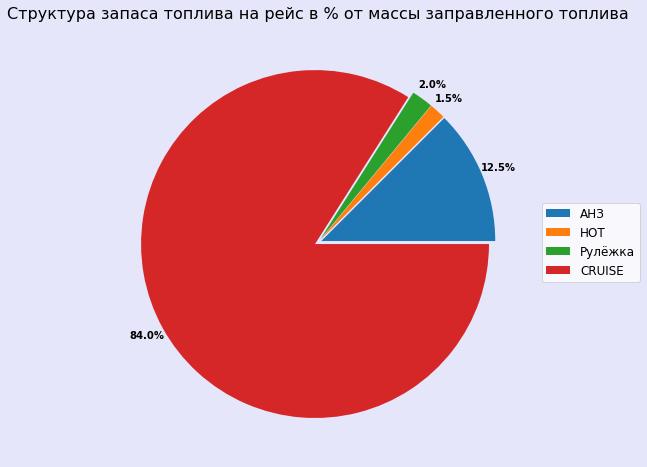

In [9]:
#------------------------------------------------------------------------------#
dct = {'АНЗ': 12.5, 'НОТ': 1.5, 'Рулёжка': 2, 'CRUISE': 84}
struct = pd.Series(dct)
fig, ax = plt.subplots(figsize=(8,8), facecolor='Lavender')
wedges, texts, autotexts = ax.pie(x=struct, autopct="%.1f%%", explode=[0.02]*4, 
                                                            pctdistance=1.1);
ax.legend(wedges, dct.keys(), loc="center left", bbox_to_anchor=(1, 0., 0.5, 1),
                                                                  fontsize=12)
plt.setp(autotexts, size=10, weight="bold")
ax.set_title(
    'Структура запаса топлива на рейс в % от массы заправленного топлива',
    fontsize=16);

* АНЗ - аэронавигационный запас топлива: часть запаса топлива на борту самолёта к началу разбега, заправленная сверх расчётного количества, необходимого для выполнения полёта от аэропорта вылета до аэропорта назначения
* НОТ - невырабатываемый запас топлива: часть запаса топлива, остающаяся в топливной системе самолёта в силу её конструктивных особенностей
* Рулёжка - расход топлива в режимах, отличных от CRUISE (режимы GROUND IDLE (Taxi out), TAKE OFF, CLIMB, DESCENT, APPROACH, REVERSE, GROUND IDLE (Taxi in))
* CRUISE - оптимальный режим полёта - с крейсерской скоростью

Таким образом, расход топлива в режиме CRUISE составляет 84% от массы потребного топлива:  
$M_{tanking} = M_{cruise}\;/\;0.84 $,  
где $M_{cruise}$ - потребная масса топлива в предположении, что самолёт летит с крейсерской скоростью в течение всего времени полёта между аэропортами вылета и назначения.

Для определения $M_{cruise}$ абсолютно НЕ достаточно просто умножить длительность полёта на расход топлива. Полученная в результате величина никак не зависит от степени загруженности салона пассажирами. Корректный расчёт потребного запаса топлива должен учитывать взлётную массу самолёта, в том числе количество пассажиров, которое пересчитывается в массу по одному из принятых правил. Например, "85 кг на 1 пассажира + 18 кг багажа". Один из примеров расчёта запаса топлива с учётом массы пассажиров приведён здесь: https://ato.soyuz.aero/?mode=cont&id=38.  
Проведение таких расчётов запаса топлива не кажется архисложной процедурой, однако требует наличия специальных знаний по специфике полётов гражданских самолётов; кроме того, необходимо наличие нужных таблиц и информации о типичных метеоусловиях на эшелонах полёта. В принципе, не вижу нерешаемых проблем, но это требует времени для освоения. Поэтому я ограничусь грубым приближением для расчёта потребного запаса топлива, которое учитывает как "порожний" вес, так и количество пассажиров на рейсе. Нам дополнительно понадобится информация о расстоянии distance между аэропортами вылета и назначения. Канонически правильным является определение этого расстояния по географическим координатам (долгота, широта), которые приведены в таблице airports базы dst_project. Более того, есть даже специальный модуль питона под названием geopy. Однако у нас мало аэропортов в нашем датасете, поэтому нужные расстояния получим "вручную" с помощью интерактивных карт (yandex или google). Именно эти расстояния добавим в датасет, признак distance.  
Итак, представим массу $M_{cruise}$ в виде суммы двух слагаемых:

$M_{cruise} = M_{cruise}^{empty} + M_{cruise}^{pass} = (flight\_duration\;/\;60) * fuel\_rate + spec\_frate * 10^{-3} * pass\_count * distance,\; кг.$

В этом уравнении первое слагаемое $M_{cruise}^{empty} = (flight\_duration\;/\;60) * fuel\_rate$ не зависит явно от массы пассажиров. Второе слагаемое $M_{cruise}^{pass} = spec\_frate * 10^{-3} * pass\_count * distance$ зависит линейно (в предположении постоянства удельного расхода топлива $spec\_frate$) от количества пассажиров и формально обращается в нуль при отсутствии пассажиров. Таким образом, мы учитываем, что для "порожнего" (без пассажиров) рейса всё равно требуется, естественно, ненулевое количество топлива.

Итоговая формула для вычисления затрат на топливо:  

$fuel\_cost = M_{tanking} * (fuel\_fare + fuelling) * 10^{-3},\;руб.$,  

где $fuel\_fare$ - стоимость топлива (руб./т), $fuelling$ - оплата услуги по заправке (руб./т).
***

In [10]:
#------------------------------------------------------------------------------#
# Добавляем distance:
data["distance"] = data["arr_air"].apply(lambda x: 1200 if x=='SVO' else 640)
data

,fl_id,dep_air,arr_air,craft_model,flight_duration,pass_count,flight_revenue,max_fuel_cap,fuel_dens,max_fuel_mass,fuel_rate,spec_frate,vcruise,max_pass_count,distance
0,136119,AAQ,SVO,Boeing 737-300,101.0,113.0,1653000.0,20102,780,15680,2600,25.2,795,130,1200
1,136120,AAQ,SVO,Boeing 737-300,99.0,109.0,1605400.0,20102,780,15680,2600,25.2,795,130,1200
2,136122,AAQ,SVO,Boeing 737-300,100.0,97.0,1431000.0,20102,780,15680,2600,25.2,795,130,1200
3,136130,AAQ,SVO,Boeing 737-300,99.0,107.0,1556600.0,20102,780,15680,2600,25.2,795,130,1200
4,136131,AAQ,SVO,Boeing 737-300,99.0,124.0,1812800.0,20102,780,15680,2600,25.2,795,130,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,136943,AAQ,EGO,Sukhoi Superjet-100,50.0,94.0,733800.0,15805,780,12328,1700,21.1,830,97,640
176,136951,AAQ,EGO,Sukhoi Superjet-100,49.0,90.0,720600.0,15805,780,12328,1700,21.1,830,97,640
177,136953,AAQ,EGO,Sukhoi Superjet-100,50.0,97.0,765300.0,15805,780,12328,1700,21.1,830,97,640
178,136956,AAQ,EGO,Sukhoi Superjet-100,50.0,96.0,746400.0,15805,780,12328,1700,21.1,830,97,640


Стоимость заправляемого топлива $fuel\_fare$ и тариф на услугу по заправке $fuelling$ определяем по информации, приведённой на сайте `ООО "БАТО"`. "Базовый авиатопливный оператор" оказывает "топливные" услуги авиакомпаниям в аэропортах Краснодара и края, включая международный аэропорт имени Коккинаки в Витязево (Анапа, AAQ). Сайт: www.bato.aero.  
На сайте в разделе "Раскрытие информации" берём данные из документа за зимний период 2016-2017 гг. В нём для каждых суток приведена стоимость топлива и стоимость услуги заправки в рублях за тонну. Можно было бы добавить к нашему исходному датасету даты вылета, чтобы учесть расходы на топливо посуточно, но с учётом сильной приближённости расчёта массы потребного топлива не имеет смысла "вышивать кружевами мешок для картошки". Поэтому в качестве стоимости топлива и услуг заправки выберем медиану за три зимних месяца. При этом к стоимости топлива и услуг по заправке добавим НДС в 20%.  
Окончательная формула для расчёта стоимости потребного топлива на рейс примет вид:

$fuel\_cost = M_{tanking} * fuel\_cost\_day * 10^{-3},\;руб.$,

где $fuel\_cost\_day = fuel\_fare + fuelling$.

,date,fuel_fare,fuelling,fuel_fare_NDS,fuelling_NDS,total
0,01.12.2016,35020,1752,42024,2102,44126
1,02.12.2016,35020,1752,42024,2102,44126
2,03.12.2016,36560,1752,43872,2102,45974
3,04.12.2016,36560,1752,43872,2102,45974
4,05.12.2016,36560,1752,43872,2102,45974
...,...,...,...,...,...,...
85,24.02.2017,33390,1752,40068,2102,42170
86,25.02.2017,33390,1752,40068,2102,42170
87,26.02.2017,33390,1752,40068,2102,42170
88,27.02.2017,33390,1752,40068,2102,42170


Медиана суточной стоимости тонны топлива (с учётом НДС 20%):
44810 рублей.


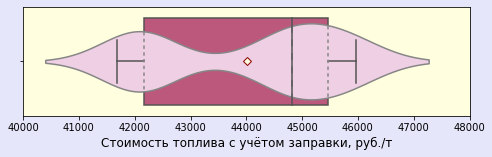

In [11]:
data_fuel = pd.read_csv('fuel.csv', sep=';')
display(data_fuel)
fuel_cost_day = data_fuel.total.median()
print(f'Медиана суточной стоимости тонны топлива (с учётом НДС 20%):')
print(f'{int(fuel_cost_day)} рублей.')
#------------------------------------------------------------------------------#
fig, ax = plt.subplots(figsize=(8,2), facecolor='Lavender')
ax.set_facecolor('LightYellow')
#---
mean_props = dict(marker='D', markeredgecolor='DarkRed',
                  markerfacecolor='LightYellow')
sns.boxplot(x="total", data=data_fuel,showmeans=True, meanprops=mean_props,
            palette='plasma')
sns.violinplot(x=data_fuel.total, width=0.7, palette="Pastel2_r", scale="count",
               inner='quartile')
#---
ax.set_xticks(range(40_000, 49_000, 1_000))
ax.set_xlabel('Стоимость топлива с учётом заправки, руб./т', fontsize=12);

**_2. Расходы на выплату зарплаты экипажу за рейс._**

Дополнительно к расходам на оплату топлива добавим выплату зарплаты экипажу лайнера. Примем её величину на уровне 20% дохода от продажи билетов при полной загрузке салона. Иначе говоря, даже если количество пассажиров на рейс меньше максимально допустимого, экипаж получит зарплату в виде фиксированного "процента" как если бы салон был загружен полностью.  
*Вычислим эту зарплату для экипажа Боинга и для экипажа Суперджета:*

In [12]:
#------------------------------------------------------------------------------#
# Фиксированная величина зарплаты экипажа (руб.):
#--- Суперджета:
wage_SU9 = data.query('pass_count==max_pass_count \
            & craft_model=="Sukhoi Superjet-100"').flight_revenue.max() * 0.2
#--- Боинга:
wage_737 = data.query('pass_count==max_pass_count \
            & craft_model=="Boeing 737-300"').flight_revenue.max() * 0.2
#---
print('Зарплата экипажа на каждом рейсе (руб.):')
print(f'\tBoeing 737-300: {int(wage_737)},')
print(f'\tSukhoi Superjet-100: {int(wage_SU9)}.')

Зарплата экипажа на каждом рейсе (руб.):
	Boeing 737-300: 377200,
	Sukhoi Superjet-100: 153060.


**_3. Расходы на оплату аэропортового и аэронавигационного обслуживания._**

Примем эту величину расходов постоянной в размере 20% доходов от продажи билетов на рейс при максимальной заполненности салона самолёта.

In [13]:
#------------------------------------------------------------------------------#
# Фиксированная величина аэропортового обслуживания (руб.):
#--- Суперджет:
air_service_SU9 = data.query('pass_count==max_pass_count \
            & craft_model=="Sukhoi Superjet-100"').flight_revenue.max() * 0.2
#--- Боинг:
air_service_737 = data.query('pass_count==max_pass_count \
            & craft_model=="Boeing 737-300"').flight_revenue.max() * 0.2
#---
print('Аэропортовое обслуживание каждого рейса (руб.):')
print(f'\tBoeing 737-300: {int(air_service_737)},')
print(f'\tSukhoi Superjet-100: {int(air_service_SU9)}.')

Аэропортовое обслуживание каждого рейса (руб.):
	Boeing 737-300: 377200,
	Sukhoi Superjet-100: 153060.


**_4. Расходы на лизинг, ремонт и обслуживание воздушных судов авиакомпании._**

Та же величина: 20% доходов от продажи билетов на рейс при максимальной заполненности салона самолёта.

In [14]:
#------------------------------------------------------------------------------#
# Фиксированная величина лизинга и техобслуживания (руб.):
#--- Суперджет:
tech_service_SU9 = data.query('pass_count==max_pass_count \
            & craft_model=="Sukhoi Superjet-100"').flight_revenue.max() * 0.2
#--- Боинг:
tech_service_737 = data.query('pass_count==max_pass_count \
            & craft_model=="Boeing 737-300"').flight_revenue.max() * 0.2
#---
print('Лизинг и техобслуживание воздушного судна (руб.):')
print(f'\tBoeing 737-300: {int(tech_service_737)},')
print(f'\tSukhoi Superjet-100: {int(tech_service_SU9)}.')

Лизинг и техобслуживание воздушного судна (руб.):
	Boeing 737-300: 377200,
	Sukhoi Superjet-100: 153060.


### Расходы на рейс. Итог.

In [15]:
#------------------------------------------------------------------------------#
def get_part_cost(model):
    cost = wage_SU9 + air_service_SU9 + tech_service_SU9
    if model == 'Boeing 737-300':
        cost = wage_737 + air_service_737 + tech_service_737
    return cost
#---
# Топливо:
M_cruise_empty = data.flight_duration/60 * data.fuel_rate
M_cruise_pass = data.spec_frate*1e-3 * data.pass_count * data.distance
M_cruise = M_cruise_empty + M_cruise_pass
M_tanking = M_cruise / 0.84
fuel_cost = M_tanking * fuel_cost_day * 1e-3
fuel_cost
# Общий расход:
cols = ["fl_id", "craft_model", "pass_count", "flight_revenue"]
df = data[cols].copy()
df["cost_tot"] = df["craft_model"].apply(get_part_cost) + fuel_cost
df["profit"] = df["flight_revenue"] - df["cost_tot"] # Прибыль от рейса.
df

,fl_id,craft_model,pass_count,flight_revenue,cost_tot,profit
0,136119,Boeing 737-300,113.0,1653000.0,1.547361e+06,105638.594603
1,136120,Boeing 737-300,109.0,1605400.0,1.536286e+06,69114.488571
2,136122,Boeing 737-300,97.0,1431000.0,1.519239e+06,-88239.218413
3,136130,Boeing 737-300,107.0,1556600.0,1.533059e+06,23540.808571
4,136131,Boeing 737-300,124.0,1812800.0,1.560483e+06,252317.088571
...,...,...,...,...,...,...
175,136943,Sukhoi Superjet-100,94.0,733800.0,6.024676e+05,131332.414413
176,136951,Sukhoi Superjet-100,90.0,720600.0,5.980746e+05,122525.359206
177,136953,Sukhoi Superjet-100,97.0,765300.0,6.046287e+05,160671.292127
178,136956,Sukhoi Superjet-100,96.0,746400.0,6.039083e+05,142491.666222


### Прибыли и убытки.

In [16]:
#------------------------------------------------------------------------------#
# Опорные параметры:
SU = "Sukhoi Superjet-100"
fl_time_SU = 50 # minutes
max_pass_count_SU = 97 # max passengers count
max_revenue_SU = data.query('craft_model==@SU'
                    and 'pass_count==max_pass_count'
                    and 'flight_duration==@fl_time_SU').flight_revenue.max()
rev_pass_SU = max_revenue_SU / max_pass_count_SU # Средний доход с 1 пассажира.
idx = data.query('craft_model==@SU'
                    and 'pass_count==max_pass_count'
                    and 'flight_duration==@fl_time_SU').flight_revenue.idxmax()
# Расходы (плановое время полёта, максимальное количество пассажиров):
cost_tot_SU = df.loc[idx, "cost_tot"]

BG = "Boeing 737-300"
fl_time_BG = 100 # minutes
max_pass_count_BG = 130 # max passengers count
max_revenue_BG = data.query('craft_model==@BG'
                        and 'pass_count==max_pass_count'
                        and 'flight_duration==@fl_time_BG').flight_revenue.max()
rev_pass_BG = max_revenue_BG / max_pass_count_BG # Средний доход с 1 пассажира.
idx = data.query('craft_model==@BG'
                    and 'pass_count==max_pass_count'
                    and 'flight_duration==@fl_time_BG').flight_revenue.idxmax()
# Расходы (плановое время полёта, максимальное количество пассажиров):
cost_tot_BG = df.loc[idx, "cost_tot"]

Ориентировочное количество пассажиров для неотрицательной прибыли:
	Sukhoi Superjet-100:  77 чел.
	     Boeing 737-300: 108 чел.


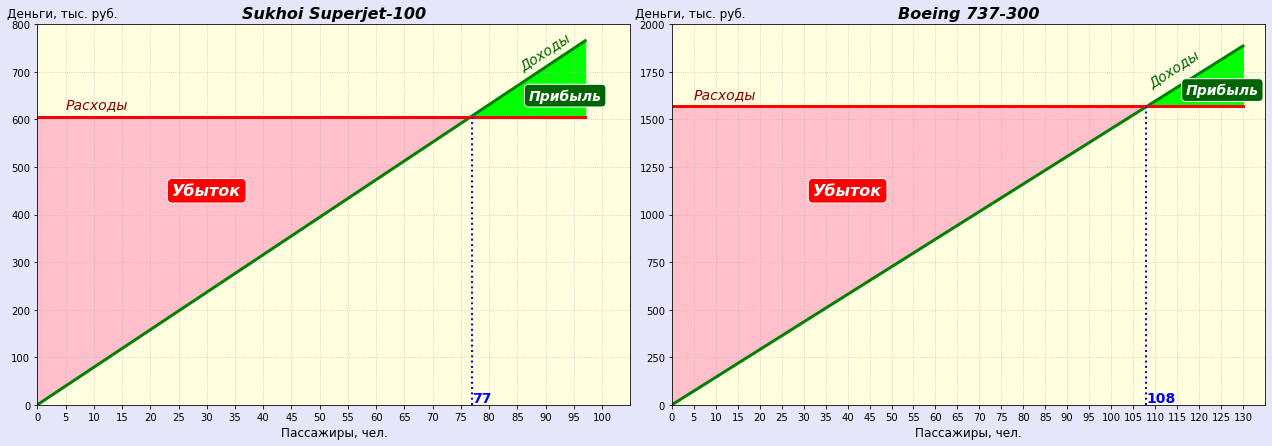

In [17]:
#------------------------------------------------------------------------------#
fig, ax = plt.subplots(1, 2, figsize=(22, 7), facecolor='Lavender');
[axs.set_facecolor('LightYellow') for axs in ax]
fig.subplots_adjust(wspace=0.07)
[axs.grid(axis = 'both', alpha = 0.75, ls = 'dotted') for axs in ax]
# Сухой:
ax[0].set_title('Sukhoi Superjet-100', fontweight = 'bold', fontsize = 16,
             style = 'italic')
x = range(0, max_pass_count_SU + 1)
y = np.arange(0, max_revenue_SU + rev_pass_SU, rev_pass_SU)/1e3
ax[0].plot(x, y, ls = '-', lw=3, color = 'g')
ax[0].plot([0, max_pass_count_SU], [cost_tot_SU/1e3, cost_tot_SU/1e3],
           ls = '-', lw=3, c = 'r')
ax[0].fill_between(x, cost_tot_SU/1e3, y, where = (y - cost_tot_SU/1e3) < 0,
                  color='pink')
ax[0].fill_between(x, cost_tot_SU/1e3, y, where = (y - cost_tot_SU/1e3) > 0,
                  color='lime')
ax[0].text(s = 'Расходы', x = 5, y = cost_tot_SU/1e3 + 20, ha = 'left',
           color ='darkred', fontsize=14, style = 'italic')
ax[0].text(s = 'Доходы', x = 85, y = cost_tot_SU/1e3 + 100, ha = 'left',
           color ='darkgreen', fontsize=14, style = 'italic', rotation=33);
ax[0].set_ylabel("Деньги, тыс. руб.", rotation=0, position=(0, 1.01), ha="left",
                 fontsize=12);
ax[0].set_xlabel('Пассажиры, чел.', fontsize=12)
ax[0].set_xticks(range(0, 100 + 1, 5))
ax[0].set_xlim([0, 105]); ax[0].set_ylim([0, 800])
#------------------------------------------------------------------------------#
props = dict(boxstyle = 'round', fc = 'red', alpha = 1, ec='white')
ax[0].text(s = 'Убыток', x = 30, y = 450, ha = 'center', va = 'center',
           color ='white', bbox=props, fontsize = 16, style = 'italic',
           fontweight = 'bold')
props = dict(boxstyle = 'round', fc = 'darkgreen', alpha = 1, ec='white')
ax[0].text(s = 'Прибыль', x = 87, y = 650, ha = 'left', va = 'center',
           color ='white',bbox=props, fontsize = 14, style = 'italic',
           fontweight = 'bold');
# Боинг:
ax[1].set_title('Boeing 737-300', fontweight = 'bold', fontsize = 16,
             style = 'italic')
x = range(0, max_pass_count_BG + 1)
y = np.arange(0, max_revenue_BG + rev_pass_BG, rev_pass_BG)/1e3
ax[1].plot(x, y, ls = '-', lw=3, color = 'g')
ax[1].plot([0, max_pass_count_BG], [cost_tot_BG/1e3, cost_tot_BG/1e3],
           ls = '-', lw=3, c = 'r')
ax[1].fill_between(x, cost_tot_BG/1e3, y, where = (y - cost_tot_BG/1e3) < 0,
                  color='pink')
ax[1].fill_between(x, cost_tot_BG/1e3, y, where = (y - cost_tot_BG/1e3) > 0,
                  color='lime')
ax[1].text(s = 'Расходы', x = 5, y = cost_tot_BG/1e3 + 40, ha = 'left', 
           color ='darkred', fontsize=14, style = 'italic')
ax[1].text(s = 'Доходы', x = 108, y = cost_tot_BG/1e3 + 100, ha = 'left',
           color ='darkgreen', fontsize=14, style = 'italic', rotation=33);
ax[1].set_ylabel("Деньги, тыс. руб.", rotation=0, position=(0, 1.01), ha="left",
                 fontsize=12);
ax[1].set_xlabel('Пассажиры, чел.', fontsize=12)
ax[1].set_xticks(range(0, 130 + 1, 5))
ax[1].set_yticks(range(0, 2000 + 1, 250))
ax[1].set_xlim([0, 135]); ax[1].set_ylim([0, 2000])
#------------------------------------------------------------------------------#
props = dict(boxstyle = 'round', fc = 'red', alpha = 1, ec='white')
ax[1].text(s = 'Убыток', x = 40, y = 1125, ha = 'center', va = 'center',
           color ='white', bbox=props, fontsize = 16, style = 'italic',
           fontweight = 'bold')
props = dict(boxstyle = 'round', fc = 'darkgreen', alpha = 1, ec='white')
ax[1].text(s = 'Прибыль', x = 117, y = cost_tot_BG/1e3 + 60, ha = 'left',
           color ='white',bbox=props, fontsize = 14, style = 'italic',
           fontweight = 'bold');
#------------------------------------------------------------------------------#
# Количество пассажиров для нулевой прибыли:
pass_profit0_SU = cost_tot_SU * max_pass_count_SU / max_revenue_SU
pass_profit0_SU = int(round(pass_profit0_SU, 0))
pass_profit0_BG = cost_tot_BG * max_pass_count_BG / max_revenue_BG
pass_profit0_BG = int(round(pass_profit0_BG, 0))
print('Ориентировочное количество пассажиров для неотрицательной прибыли:')
print(f'\tSukhoi Superjet-100:  {pass_profit0_SU} чел.')
print(f'\t     Boeing 737-300: {pass_profit0_BG} чел.')
#---
ax[0].plot([pass_profit0_SU, pass_profit0_SU], [0, cost_tot_SU/1e3], ls = ':',
           lw=2, c = 'b')
ax[1].plot([pass_profit0_BG, pass_profit0_BG], [0, cost_tot_BG/1e3], ls = ':',
           lw=2, c = 'b');
ax[0].text(s = f'{pass_profit0_SU}', x = pass_profit0_SU, y = 0, ha = 'left',
           va='bottom', color ='b', fontsize = 14, fontweight = 'bold')
ax[1].text(s = f'{pass_profit0_BG}', x = pass_profit0_BG, y = 0, ha = 'left',
           va='bottom', color ='b', fontsize = 14, fontweight = 'bold');

Итак, принцип отбора убыточных зимних рейсов очевиден: profit < 0.  
**_Убыточные рейсы, от которых можно отказаться:_**

In [18]:
print(f'Количество убыточных зимних рейсов составляет {df[df.profit<0].shape[0]} шт.')
print('\nЭто следующие рейсы:')
df[df.profit<0]

Количество убыточных зимних рейсов составляет 23 шт.

Это следующие рейсы:


,fl_id,craft_model,pass_count,flight_revenue,cost_tot,profit
2,136122,Boeing 737-300,97.0,1431000.0,1.519239e+06,-88239.218413
14,136178,Boeing 737-300,99.0,1434600.0,1.520154e+06,-85553.911429
16,136185,Boeing 737-300,104.0,1520000.0,1.537466e+06,-17466.219365
18,136202,Boeing 737-300,100.0,1495600.0,1.528702e+06,-33101.952381
19,136204,Boeing 737-300,107.0,1457800.0,1.535371e+06,-77570.818413
28,136250,Boeing 737-300,99.0,1407800.0,1.524777e+06,-116977.165397
29,136252,Boeing 737-300,102.0,1517600.0,1.529617e+06,-12016.645397
30,136253,Boeing 737-300,93.0,1407800.0,1.508163e+06,-100363.324444
40,136282,Boeing 737-300,106.0,1518800.0,1.536069e+06,-17269.285397
44,136306,Boeing 737-300,102.0,1443200.0,1.527305e+06,-84105.018413


Прибыльность этих рейсов отрицательна.  
Посчитаем среднюю и максимальную прибыль **_оставшихся_** рейсов:

In [19]:
profit_mean = round(df[df.profit>=0].profit.mean(), 0)
profit_max = round(df[df.profit>=0].profit.max(), 0)
print(f'Средняя прибыль оставшихся рейсов: {int(profit_mean)} руб.')
print(f'Максимальная прибыль рейса: {int(profit_max)} руб.')

Средняя прибыль оставшихся рейсов: 131503 руб.
Максимальная прибыль рейса: 318150 руб.


График напоследок.

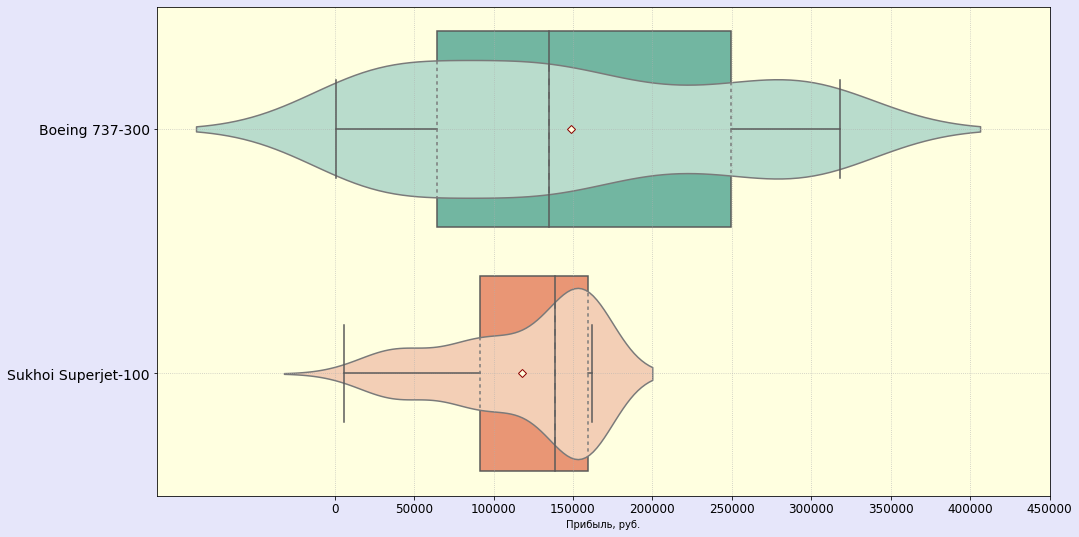

In [20]:
#------------------------------------------------------------------------------#
plt.rcParams.update({
        "grid.linestyle"       : "dotted",
        "grid.alpha"           : 0.75,
        "figure.facecolor"     : "Lavender",
        "xtick.labelsize"      : 12,
        "ytick.labelsize"      : 14,
})

cols = ['craft_model', 'profit']; dff = df[df.profit>=0][cols].copy()
fig, ax = plt.subplots(figsize=(16, 9))
ax.set_facecolor('LightYellow')
#---
mean_props = dict(marker='D', markeredgecolor='DarkRed',
                  markerfacecolor='LightYellow')
sns.boxplot(x="profit", y="craft_model", data=dff, palette="Set2",
            showmeans=True, meanprops=mean_props)
sns.violinplot(x=dff.profit, y=dff.craft_model, width=0.7, palette="Pastel2",
               scale="count", inner='quartile')
#---
ax.grid("both"); ax.set_ylabel(''); ax.set_xlabel('Прибыль, руб.');
ax.set_xticks(range(0, 450_000 + 1, 50_000));